In [ ]:
import random
import numpy as np
import scipy.stats as rv
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.gridspec as gridspec
from operator import itemgetter
from scipy import ndimage
import itertools
import seaborn as sns
from scipy.stats import beta
from scipy.stats import binom


plt.style.use('ggplot')

Introduction


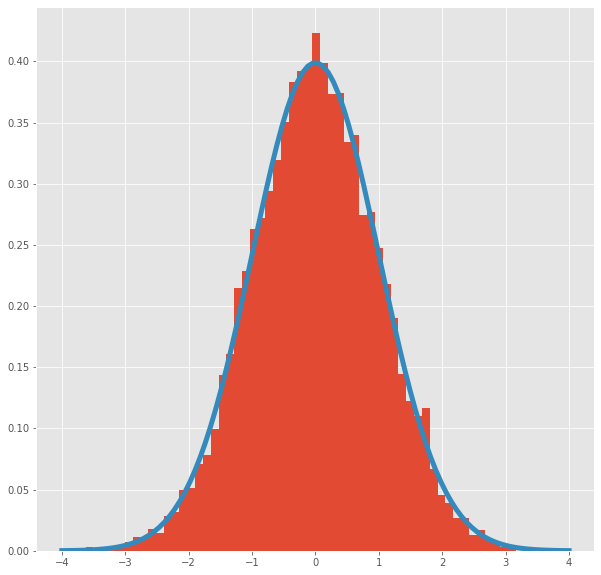

In [ ]:


x = np.linspace(-4, 4, 100)
mean = 0
variance =1
n = np.int(1e4)
sample = rv.norm.rvs(mean,np.sqrt(variance), size = n)


pdf = rv.norm.pdf(x,mean,np.sqrt(variance))


fig = plt.figure(figsize = (10,10))
gs = gridspec.GridSpec(1,1)
ax = {}
ax[0] = plt.subplot(gs[0])
ax[0].hist(sample, density = True, bins = 'auto')
ax[0].plot(x, pdf,alpha=1,lw=5)

Probability Spaces

In [ ]:
#task 1

a = [2,4,6]
b = [1,2,3,4]
c = [ x for x in a if x in b]

from scipy.stats import randint

p = lambda x,y : x/y

should_be  = p(len(a),6) * p(len(b),6)

sample_size = 100000
sample_draws = np.random.randint(1,7,dtype=int,size=sample_size)

draws_in_interstect = [x for x in sample_draws if x in c ]

pc = p(len(draws_in_interstect),sample_size)
print("simmulation p ", pc )
print("real p ", should_be)



#task 2

A = [2,4,6]
B = [2]

intersection = [2]

pa = p(len(A),6)
pb = p(len(B),6)
p_i = pa+pb - pa

p_a_given_b = p_i/pb
p_b_given_a = p_i/pa


#simmulation
print("\n")
print("Task 2 ")
sample_size = 100000
sd = np.random.randint(1,7,dtype=int,size=sample_size)

pa_s = p(len([x for x in sd if x in A]),sample_size)
pb_s = p(len([x for x in sd if x in B]),sample_size)

print("PA empirical : " +str(pa) + " PA from sample "+str(pa_s))
print("PB empirical : " +str(pb) + " PB from sample "+str(pb_s))

pi_s = p(len([x for x in sd if x in A and x in B]),sample_size)
print("PIntersection empirical : " +str(p_i) + " Pintersection from sample "+str(pi_s))

print("P a given b empirical : " +str(p_a_given_b) + " P a given b from sample "+str(pi_s/pb_s))
print("P b given a empirical : " +str(p_b_given_a) + " P a given b from sample "+str(pi_s/pa_s))

# task 3
print("\n")
print("Task 3 ")

ss = 10000
coins = np.random.randint(0,2,dtype = int, size = (ss,2))

f_head_first = lambda x : x[0] ==1
f_snake_eyes = lambda x: x[0] == x[1]

p_head_first = p(len([ x for x in coins if f_head_first(x) ]), ss )
p_same_outcome = p(len([ x for x in coins if f_snake_eyes(x) ]), ss )

print("P head first : " +str(p_head_first) + " P same outcome "+str(p_same_outcome))



simmulation p  0.33304
real p  0.3333333333333333


Task 2 
PA empirical : 0.5 PA from sample 0.49897
PB empirical : 0.16666666666666666 PB from sample 0.16628
PIntersection empirical : 0.16666666666666663 Pintersection from sample 0.16628
P a given b empirical : 0.9999999999999998 P a given b from sample 1.0
P b given a empirical : 0.33333333333333326 P a given b from sample 0.3332464877647955


Task 3 
P head first : 0.5028 P same outcome 0.501


##3
Random variables

###3.1

Simulate the probability space model of throwing to dice and the random variable corresponding the sum of the pips. Visualize a normalized histograms of simulated outcomes of this random variable and compare it to the theoretical prediction.

Text(0.5, 1.0, 'Expectation 7.0')

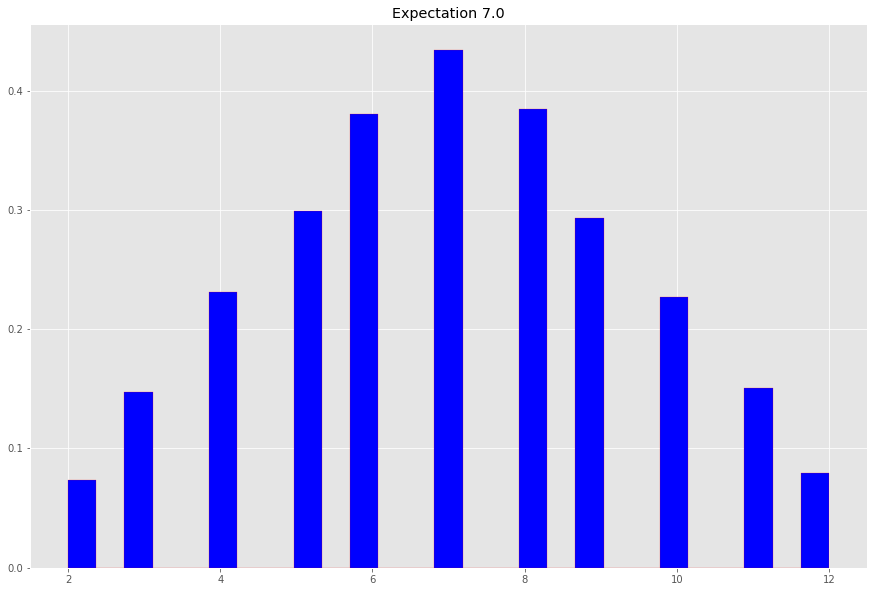

In [ ]:
random_var = lambda x : x[0]+x[1]
ss = 10000
dice = np.random.randint(1,7,dtype=int,size=(ss,2))

outcomes =[random_var(x) for x in dice]
fig, axs = plt.subplots(1,1, figsize=(15,10))
axs.hist(outcomes, density=True,  bins='auto', facecolor='blue', edgecolor='red', linewidth=.2);

space =[x for x in range(1,7)]
prob = 1/len(space)**2

expectation = sum([prob* random_var((x,y)) for x in space for y in space])
axs.set_title("Expectation {0}".format(expectation))

###3.2
Visualize the PMF of a Bernoulli random variable and a normalized histogram of many samples of a Bernoulli random variable with identical parameter setting on top of each other.


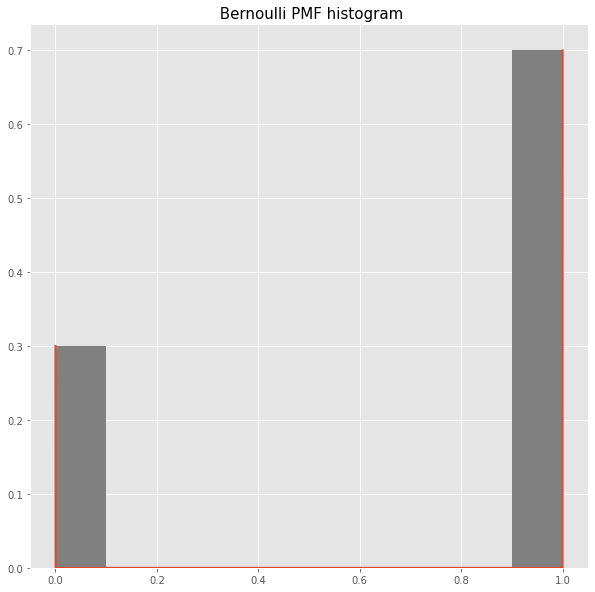

In [ ]:
p = 0.7
lspace = np.linspace(0,1,10000)
x = rv.bernoulli.rvs(p,size=10000)
w = np.ones_like(X_bern)/float(len(X_bern))

fig, axs = plt.subplots(1,1, figsize=(10,10))
axs.hist(x, weights=w, color='b',  facecolor='grey');
axs.plot(lspace, rv.bernoulli.pmf(lspace,p), linewidth=2);

axs.set_title(' Bernoulli PMF histogram', fontsize=15);

###3.3
Visualize the PDF of a Gaussian random variable and a normalized histogram of many samples of a Gaussian random variable with identical parameter settings on top of each other.

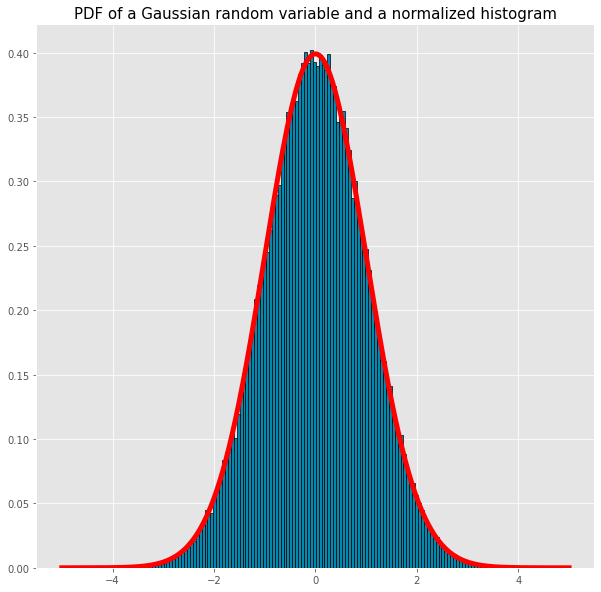

In [ ]:
mi   = -5
mx   = 5
samples   = 100000
x_space = np.linspace(mi,mx,samples)
X_norm = rv.norm.rvs(0,1,size=samples) # realization of norm dist

fig, axs = plt.subplots(1,1, figsize=(10,10))
axs.hist(X_norm,density=True, color='#0489B1', bins='auto',edgecolor='#000000', linewidth=.7);
axs.plot(x_space, rv.norm.pdf(x_space,0,1),color = 'r', linewidth=5);
axs.set_title('PDF of a Gaussian random variable and a normalized histogram', fontsize=15);

4 Join Distributions

###4.1
Write a simulation that demonstrates that the marginal distributions of a bivariate Gaussian distri- bution with expectation parameter and covariance parameters

$μ = {1 \choose 2}$ $\sum =  \begin{pmatrix}
  0.3 & 0.2 \\
  0.2 & 0.5 \\
 \end{pmatrix}$

respectively, are given by univariate Gaussian distributions with expectation parameters $μ_1 = 1$, $μ_2 = 2$ and variance parameters $σ^2 = 0.3$ and $σ^2 = 0.5$, respectively.

In [ ]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
import math

mu =[1,2]
sigma = [[0.3,0.2],[0.2,0.5]]



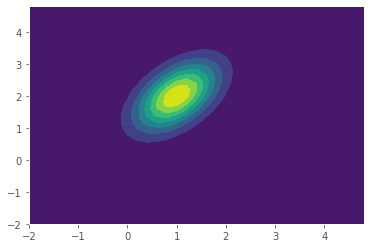

In [ ]:
x, y = np.mgrid[-2:5:0.2, -2:5:0.2]
pos = np.dstack((x, y))
d = multivariate_normal(mu, sigma)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, d.pdf(pos))







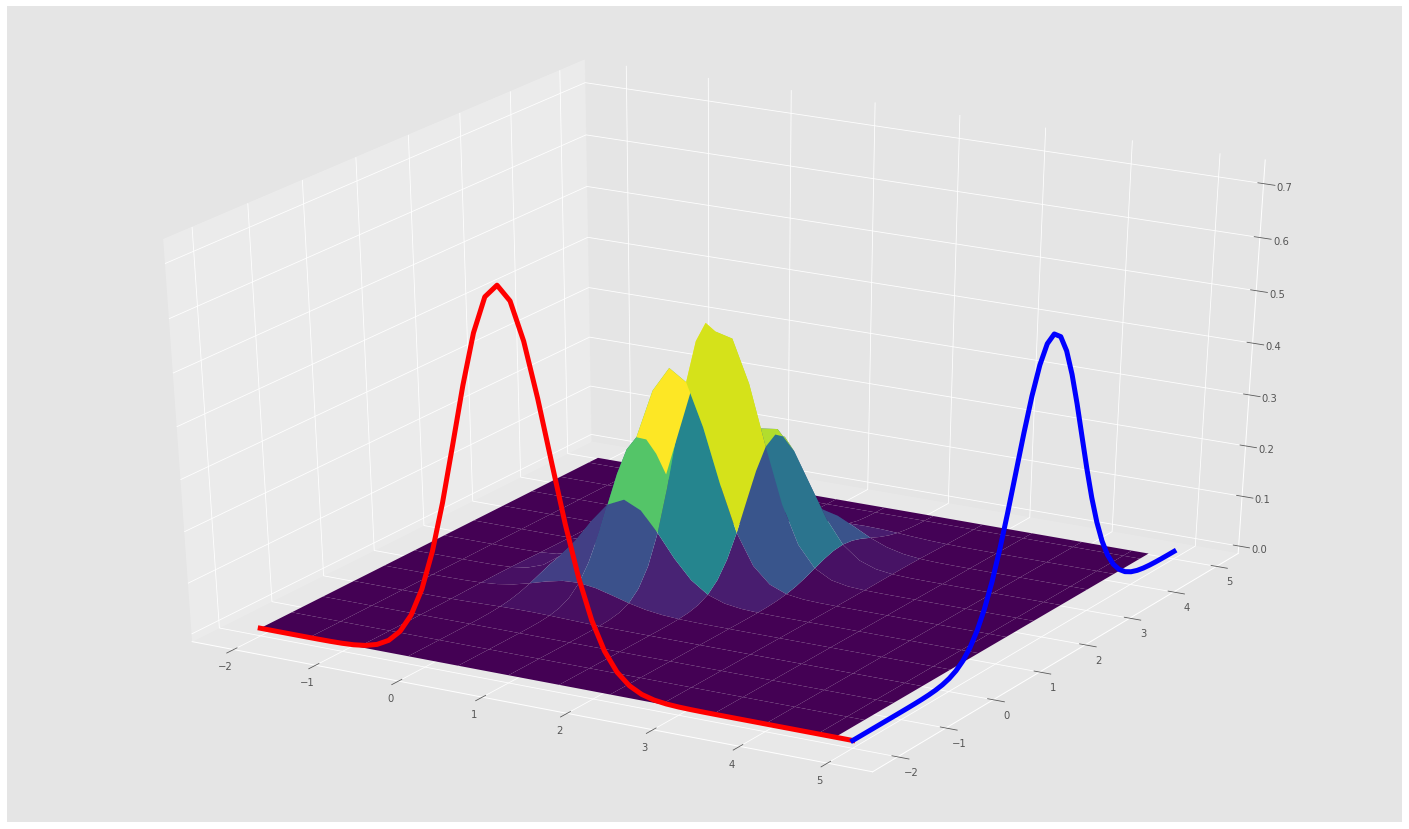

In [ ]:
fig = plt.figure(figsize=(25,15))

ax1 = fig.add_subplot(111,projection='3d')
ax1.plot_surface(x, y, d.pdf(pos),rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
xm =np.linspace(-2,5)

ax1.plot3D(xm, [-2 for x in range(len(xm))],norm.pdf(xm,1,math.sqrt(0.3)),color = 'r', linewidth=5);
ax1.plot3D([5 for x in range(len(xm))],xm ,norm.pdf(xm,2,math.sqrt(0.5)),color = 'b', linewidth=5);

##4.2  and 4.3
Write a simulation that verifies that obtaining samples from 2 independent univariate Gaussian distributions with parameters $μ_i , σ_i^2 > 0, i = 1, 2$ is equivalent to obtaining samples from a two-dimensional Gaussian distribution with the appropriately specified parameters $μ ∈ \mathbb{R}^2 and \sum ∈ \mathbb{R}^{2×2}$ .

univariate and multivariate with : M:1,V:0.3
 sample means
univariate: 0.9802214625658969, multivariate: 0.992654592411966
 sample standard deviation:
univariate: 0.28494691849856346, multivariate: 0.3079026962448447
______________________________
univariate and multivariate with : M:2,V:0.5
 sample means
univariate: 2.0043340530010596, multivariate: 1.9966667310836632
 sample standard deviation:
univariate: 0.48207597311402034, multivariate: 0.47529896675279565
______________________________


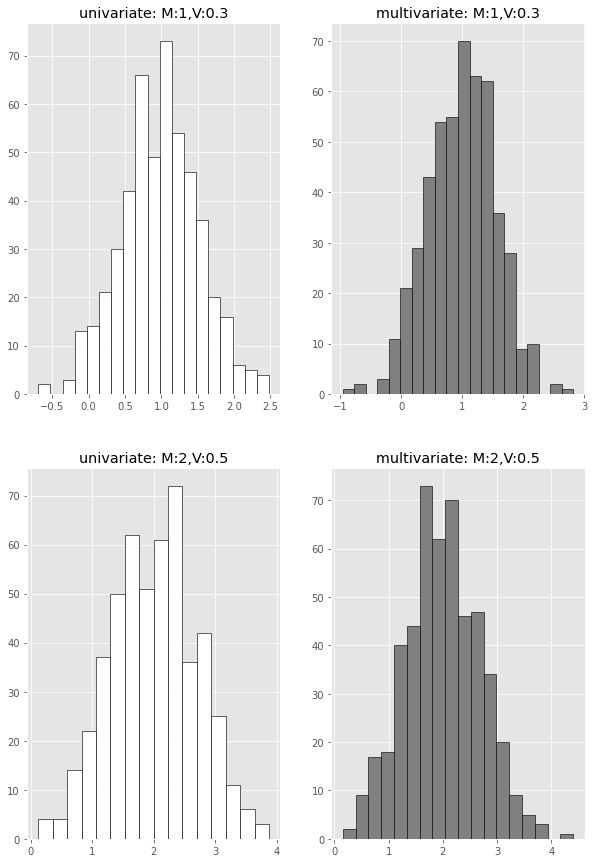

In [ ]:

from scipy.stats import multivariate_normal
from scipy.stats import norm
import math
mean, cov = np.array([1,2]), np.array([[.3,.2],[.2,.5]])
n_samples = 500

multivariate_sample=multivariate_normal.rvs(mean,cov,n_samples)

data_univariate = []
for k in range(2):
  data_univariate.append(norm.rvs(loc=mean[k], scale= math.sqrt(cov[k][k]),size = n_samples))
univariate = np.array(data_univariate)


def unpack(lst, elem):
    return list( map(itemgetter(elem), lst))

fig, ax = plt.subplots(2,2,figsize=(10,15))
for i in range(2):
  ax[i][0].hist(univariate[i],bins='auto',  facecolor='white',edgecolor='black', linewidth=.6,)
  ax[i][0].set_title("univariate: M:{0},V:{1}".format(mean[i],cov[i][i]))
  ax[i][1].hist(unpack(multivariate_sample,i),bins='auto',  facecolor='grey',edgecolor='black', linewidth=.6,)
  ax[i][1].set_title("multivariate: M:{0},V:{1}".format(mean[i],cov[i][i]))
  print("univariate and multivariate with : M:{0},V:{1}".format(mean[i],cov[i][i]))
  print(" sample means")
  print("univariate: {0}, multivariate: {1}".format(np.mean(univariate[i]),np.mean(unpack(multivariate_sample,i))))
  print(" sample standard deviation:")
  print("univariate: {0}, multivariate: {1}".format(np.var(univariate[i]),np.var(unpack(multivariate_sample,i))))
  print("______________________________")

##4.3 try to replicate image on pdf
Write a simulation that exemplary verifies the analytical results on conditional Gaussian distributions for the case of a bivariate Gaussian distribution.

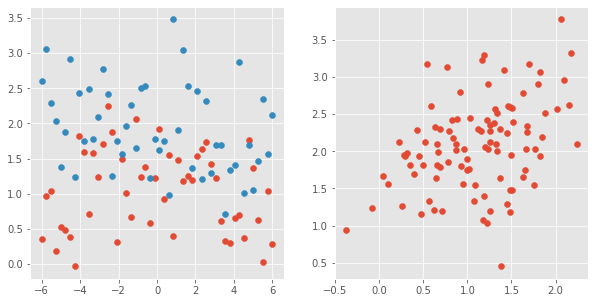

In [ ]:
mu_x = 1
mu_y = 2
x_var =0.3
y_var = 0.5
sample_x = rv.norm.rvs(mu_x,np.sqrt(x_var),size = 50)
sample_y = rv.norm.rvs(mu_y,np.sqrt(y_var),size = 50)
xx = np.linspace(-6,6,50)
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(xx,sample_x)
ax[0].scatter(xx,sample_y)


c = [[0.3,0.2],
       [0.2,0.5]]

mu_2d = [1,2]

joint_sample = rv.multivariate_normal.rvs(mean=mu_2d,cov =c,size = 100)
ax[1].scatter(joint_sample[:,0],joint_sample[:,1])
# joint_sample

Transformations

##5.1
Write a program that generates pseudo-random numbers from an exponential distribution using a uniform pseudo-random number generator and the probability integral transform theorem.


No handles with labels found to put in legend.


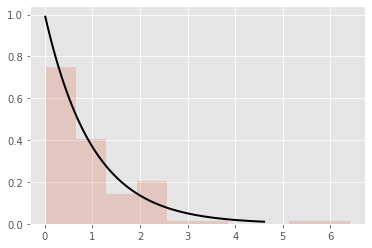

No handles with labels found to put in legend.


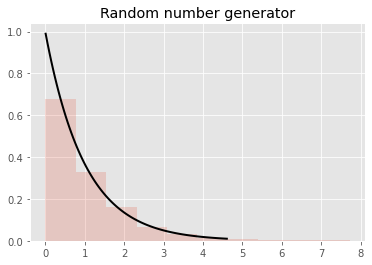

In [ ]:
"""
set y = inverse of some cdf
y now has inverse(inverse of some cdf ) which is the distribution with the cdf
generate random numbers and plug into y varaible to get the desired distro

"""
import numpy as np
from scipy.stats import uniform
from scipy.stats import expon

random_var = lambda val : np.log(1/val)
sample = uniform.rvs(size = 1000)
results = [random_var(v) for v in sample ]
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, expon.pdf(x), 'k-', lw=2)
ax.hist(expon.rvs(size=100), density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
ax1.set_title("Regular exponential function")
plt.show()

fig1, ax1 = plt.subplots(1, 1)
ax1.plot(x, expon.pdf(x), 'k-', lw=2)
ax1.hist(results, density=True, histtype='stepfilled', alpha=0.2)
ax1.legend(loc='best', frameon=False)
ax1.set_title("Random number generator")
plt.show()


##5.2
Let  𝑋∼𝑁(0,1)  and let  𝑌=𝑒𝑥𝑝(𝑋) . Evaluate the PDF of  𝑌  analytically and verify your evaluation using a simulation based on drawing random numbers from  𝑁(0,1) .

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.stats import expon
x_min = -3
x_max = -x_min
x_res = 1000
x = np.linspace(x_min, x_max, x_res)
y_min = 1e-3
y_max = 5
y = np.linspace(y_min, y_max, x_res)
n = 10000
normal_sample = norm.rvs(size=1000)
exponential_vals = np.exp(normal_sample)

# plotting
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].hist(normal_sample, density=True, bins='auto',  facecolor='#D8D8D8',edgecolor='#000000', linewidth=.2);
axs[0].plot(x, rv.norm.pdf(x));
axs[0].set_title(r'X ~ N(0,1)')
axs[0].set_xlabel('x')
axs[1].set_xlabel('x')



axs[1].plot(x, np.exp(x), linewidth=2, color='red')
axs[1].set_title(r'$f(x) = exp(x)$')



# py = 1/1st_derivative(f_inverse(y)) * px(f_inverse(y))
pdfy = lambda vals : (1/np.sqrt(2*np.pi)) * (1/np.abs(vals))* np.exp(-1/2*(np.log(vals)**2))



fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.plot(y, pdfy(y), 'k-', lw=2)
ax1.hist(exponential_vals, bins = 'auto',density=True, histtype='stepfilled', alpha=0.2,linewidth=.2)
ax1.legend(loc='best', frameon=False)
ax1.set_title("Bijective functions")
plt.show()



##5.3
Let $X ∼ N (0, 1)$ and let $Y = X^2$ . By simulation, validate that $Y$ is distributed according to a chi-squared distribution with one degree of freedom. Next, let $X_1,...,X_{10} ∼ N(0,1)$ and let $Y = \sum_{i=1}^{10} X_i^2$. By simulation, validate that $Y$ is distributed according to a chi-squared distribution ten degrees of freedom

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.stats import chi2
import matplotlib.pyplot as plt


random_var = lambda x : x*x

x_atts = [0, 30, 1000]
x = np.linspace(0,30,1000)
thetas = [1,10]
repeats = 10000
n = 10000

fig, axs = plt.subplots(1,2,figsize=(20,10))

for i, theta in enumerate(thetas):
  sample = np.full((n, theta), np.nan)
  for th in range(theta):
    for s_idx in range(repeats):
      s = norm.rvs(0,1)
      sample[s_idx, th] = random_var(s)
  sample = np.sum(sample,axis=1)


  axs[i].hist(sample, density=True,  bins='auto',label=rf"Hist of $\sum_{{i=1}}^{{n}} X_i^2, n={theta}$", linewidth=.2,color='b');
  axs[i].plot(x, chi2.pdf(x, theta), linewidth=2, label=rf"$\chi^2(x;{theta})$", color='red')
  axs[i].legend(fontsize=15);


 6 Expectation and Covariance

##6.1
Sample n = 10 data points of a univariate Gaussian distribution and evaluate the sample mean, sample variance, and sample standard deviation

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

ss =10
sample = norm.rvs(1,2,size =ss)

s_sum = lambda vals: np.sum(vals)
transform = lambda vals,mean:np.sum((vals-mean)**2)

mu  = (1/ss) * s_sum(sample)

print("Sample mean {0}".format(mu))

var = (1/(ss-1)) * s_sum(transform(sample,mu))
print("Sample variance {0}".format(var))

std = np.sqrt(var)

print("Sample standard deviation {0}".format(std))

Sample mean 0.5090082380594192
Sample variance 2.1612288282798007
Sample standard deviation 1.4701118420990291


##6.2
Sample n = 10 data points of a bivariate Gaussian distribution and evaluate the sample covariation and sample correlation

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

ss =10
sample = multivariate_normal.rvs([1,2],[[.3,.2],[.2,.5]],size=ss)

means = (1/ss)* np.sum(sample, axis = 0)
v_x = (1/(ss-1))* np.sum((sample[:,0] - means[0]) ** 2)
v_y = (1/(ss-1))* np.sum((sample[:,1] - means[1]) ** 2)

std_x = np.sqrt(v_x)
std_y = np.sqrt(v_y)

#cov(x,y) = e(x-e(x) * y -e(y))
cov = (1/ss-1)* np.sum((sample[:,0]-means[0])*(sample[:,1]-means[1]))

#p(x,y) = cv(x,y)/s(x)*s(y)
corr = cov/std_x*std_y

print("Means: x= {0}, y ={1}".format(means[0],means[1]))
print("Variances: x= {0}, y ={1}".format(v_x,v_y))
print("Standard Deviations: x= {0}, y ={1}".format(std_x,std_y))
print("Covariance: {0}".format(cov))
print("Corr: {0}".format(corr))


Means: x= 0.5653239224464929, y =1.9948638088279407
Variances: x= 0.3664219162451705, y =0.14595693947550845
Standard Deviations: x= 0.6053279410742334, y =0.38204311206395075
Covariance: -0.7109664991852742
Corr: -0.4487152095439864


##6.3
Validate the theorem on the variances of sums and differences of random variables using a sampling approach in a bivariate Gaussian scenario.

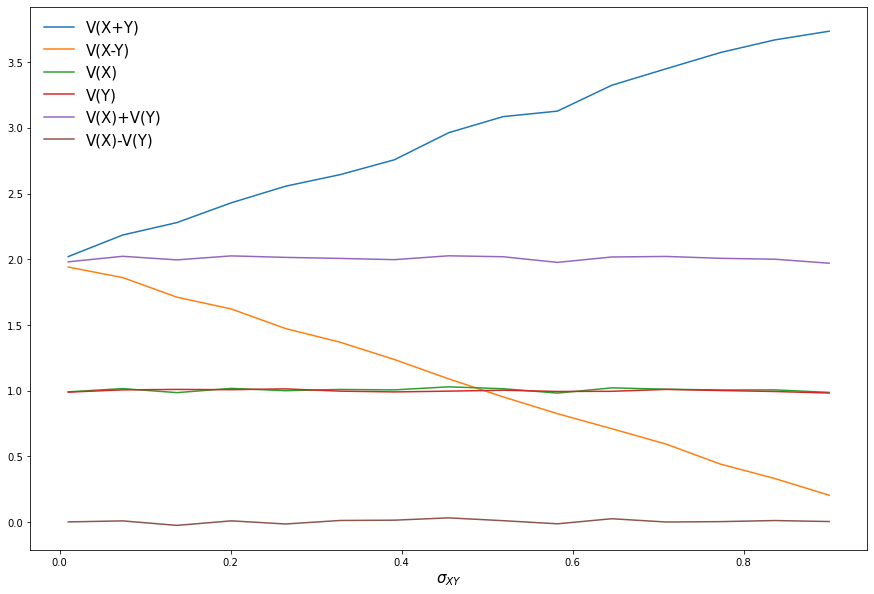

In [ ]:
"""
v(x+y) = v(x) + v(y) + 2cov(x,y)
v(x-y) = v(x) + v(y) - 2cov(x,y)
"""
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt


# init setup
n = 10000
sxy_atts = [1e-2, .9, 15]
std_xy = np.linspace(*sxy_atts)

V_X = np.full(sxy_atts[-1], np.nan)
V_Y = np.full(sxy_atts[-1], np.nan)
V_XY = np.full(sxy_atts[-1], np.nan)
V_XY_diff = np.full(sxy_atts[-1], np.nan)

# empirical variances
for i, sxy_i in enumerate(std_xy):
  mu = np.array([[1,sxy_i], [sxy_i, 1]])
  sample = multivariate_normal.rvs([0,0], mu, n)
  XY_sum = sample[:,0] + sample[:,1]
  XY_dif = sample[:,0] - sample[:,1]
  V_X[i] = np.var(sample[:,0], ddof=1)
  V_Y[i] = np.var(sample[:,1], ddof=1)
  V_XY[i] = np.var(XY_sum, ddof=1)
  V_XY_diff[i] = np.var(XY_dif, ddof=1)


# plotting
fig, axs = plt.subplots(1,1, figsize=(15,10))
axs.plot(std_xy, V_XY, label='V(X+Y)')
axs.plot(std_xy, V_XY_diff, label='V(X-Y)')
axs.plot(std_xy, V_X, label='V(X)')
axs.plot(std_xy, V_Y, label='V(Y)')
axs.plot(std_xy, V_X+V_Y, label='V(X)+V(Y)')
axs.plot(std_xy, V_X-V_Y, label='V(X)-V(Y)')
axs.set_xlabel('$\sigma_{XY}$', fontsize=15)
axs.legend(fontsize=15, frameon=False);

7 Inequalities and Limits

##7.1
Write simulations that validate the Markov and Chebychev inequalities.

In [ ]:
#markov if p(X >=0) =1 then p(X>=x) <=E(x)/x
import numpy as np
from scipy.stats import norm
from scipy.stats import chi2
import matplotlib.pyplot as plt
fig, axi = plt.subplots(1,2, figsize=(20,10))

x_range = [0.001,30,100]
x = np.linspace(*x_range)
axi[0].plot(x, chi2.pdf(x,10), color='#0489B1', label='$\chi^2(x;10)$', linewidth=2)
axi[0].plot(10,0,'o', c='orange', clip_on=False, label='E(X)', markersize=10)
axi[0].set_ylim(0)
axi[0].legend(fontsize =15);
repeats = 100
results = np.full(x_range[2], np.nan)
samples = []
for i in range(repeats):
  samples.append(chi2.rvs(10, size=100))

for x_idx, x_i in enumerate(x):

  results[x_idx] = np.mean(samples[x_idx] >= x_i)

axi[1].plot(x,10/x, c='black', label='E(X)/x')
axi[1].plot(x,results, c='red', label=r'$P(X\geq x)$')

axi[0].set_xlabel('x')
axi[1].set_xlabel('x')
axi[1].set_ylim(0,5)
axi[1].legend(fontsize=15)
fig.suptitle('Markov inequality', fontsize=20)


# Chebychev inequality p(x-e(x) >= x ) <= V(X)/x**2
fig, axs = plt.subplots(1,2, figsize=(20,10))

x_range = [-10,10,100]
x = np.linspace(*x_range)

axs[0].plot(x, norm.pdf(x,0,np.sqrt(3)), color='#0489B1', label='N(x;0,3)', linewidth=2)
axs[0].plot(0,0,'o', c='orange', clip_on=False, label='E(X)', markersize=10)
axs[0].plot(3,0,'o', color='#088A08', clip_on=False, label='V(X)',markersize=10)
axs[0].set_ylim(0, 0.25)
axs[0].set_xlabel('x')
axs[1].set_xlabel('x')
axs[0].legend(fontsize =15);
fig.suptitle('Chebychev inequality', fontsize=20)

repeats = 100
result_avg = np.full(x_range[2], np.nan)
results = np.full(x_range[2], np.nan)
samples = []
for i in range(repeats):
  samples.append(norm.rvs(np.sqrt(3), size=500))

for x_idx, x_i in enumerate(x):
  results[x_idx] = np.mean(samples[x_idx] >= x_i)

axs[1].plot(x,3/x**2, c='black', label='$V(X)/x^2$')
axs[1].plot(x,results, c='red', label=r'$P(|X-E(X)|\geq x)$')

axs[1].set_ylim(0,.8)
axs[1].legend(fontsize=10)

##7.2
Write a simulation that validates the Weak Law of Large Numbers.

In [ ]:
""" lim.  p(xbar - mu < eps) =1
    n-> inf """

import numpy as np
from scipy.stats import norm
from scipy.stats import chi2
import matplotlib.pyplot as plt
mu = 1
var  =2

means = []
eps = .1
repeats = 10
sample_sizes = [10,100,1000,10000]
for ss in sample_sizes:
  for i in range(repeats):
    sample = norm.rvs(mu,var,size = ss )
    means.append(np.mean(sample))

  means = np.asarray(means)
  estimations = [1 for x in means if x -mu < eps]
  print("Sample size ", ss)
  print("Probability", sum(estimations)/repeats)
  means =[]







Sample size  10
Probability 0.3
Sample size  100
Probability 0.9
Sample size  1000
Probability 0.9
Sample size  10000
Probability 1.0


##7.3
Write a simulation that validates the Lindenberg-Lévy Central Limit Theorem.

In [ ]:

"""
y = sum(x_i) - sum(mus)/ sqrt(sum(variances))

lim.   P(y <=x)  = ~n(0,1) in cdf if cdf = phi => the limit of P is approximately phi(x)
n -> inf
"""
import numpy as np
import  scipy.stats as sstats
import matplotlib.pyplot as plt
x_min   = -2
x_max   = 2
x_space = np.linspace(x_min,x_max,10)

def getGammaSample(ss):
  # scale 1 reduces to the exp dist
  return sstats.gamma.rvs(1,size=ss)

def formula(sample):
  mu=sstats.gamma.stats(1, moments = 'm')
  sigma = sstats.gamma.stats(1,moments='v')
  n = len(sample)
  return (np.mean(sample)- mu) / ( sigma / (n** .5))

sample_sizes =[5,10,100,1000]
results =[]
for ss in sample_sizes:

  same_sample_res = []
  for i , x in np.ndenumerate(x_space):

    empirical_vals =np.zeros(100)
    for simulation in range(100):
      empirical_vals[simulation] = formula(getGammaSample(ss))

    p = (empirical_vals <= x).sum() / 100
    same_sample_res.append(p)
  results.append(same_sample_res)

plt.figure(figsize=(15,10))
plt.plot(x_space, sstats.norm.cdf(x_space,0,1), linewidth = 6, color = 'k')
plt.plot(x_space,results[0],color='r')
plt.plot(x_space,results[1],color='b')
plt.plot(x_space,results[2],color='y')
plt.plot(x_space,results[3],color='g')
plt.legend([
            '$\Phi(x)$',
            "n={}".format(sample_sizes[0]),
            "n={}".format(sample_sizes[1]),
            "n={}".format(sample_sizes[2]),
            "n={}".format(sample_sizes[3]),

            ], loc = 'upper left',
                  fontsize = 20,
                  frameon = False)
plt.show()



plt.figure(figsize=(15,10))
plt.plot(x_space, sstats.norm.cdf(x_space,0,1), linewidth = 1, color = 'k')
plt.plot(x_space,results[3],color='g')
plt.legend([
            '$\Phi(x)$',
            "n={}".format(sample_sizes[3]),

            ], loc = 'upper left',
                  fontsize = 20,
                  frameon = False)
plt.show()

##7.4
Write a simulation that validates the Liapunov Central Limit Theorem

In [ ]:
"""
NOT iid samples
lim p(sum(xi) - sum(meani)/ sqrt(sum(var_i)) <=x) => converges in distro to Normal CDF(0,1)
n->inf
"""
import numpy as np
import  scipy.stats as rv
import matplotlib.pyplot as plt
from matplotlib import cm

def frormula(xs,mus,vars):
 return (np.sum(xs) - np.sum(mus))/np.sqrt(np.sum(vars))

s_sizes   = [1, 5, 10, 100]
# sample sizes


x_min   = -2
x_max   = 2
x_res   = np.int(20)
x_space = np.linspace(x_min,x_max,x_res)

repeats = 500                          # simulation repeats for ECDF stimation
ecdf    = np.full((x_res, len(s_sizes)), np.nan)   # arr for empirical cdf array


for ssize_idx, s_size in np.ndenumerate(s_sizes):

        Y = np.full(repeats, np.nan)
        for s in range(repeats):

            X       = np.full(s_size, np.nan)
            mu      = np.full(s_size, np.nan)
            sigsqr  = np.full(s_size, np.nan)

            for k in np.arange(s_size):

                mu[k], sigsqr[k] = rv.gamma.stats(k+1, moments = 'mv')
                X[k] = rv.gamma.rvs(k+1)


            Y[s] = frormula(X,mu,sigsqr)
        # x-space iterations
        for x_idx ,x in np.ndenumerate(x_space):

          ecdf[x_idx,ssize_idx] = np.mean(Y <= x)


fig, ax = plt.subplots(1,2, figsize=(20,15));  # create figure object with 2 axes

xi = np.linspace(0,150,1000)
crange = s_sizes[-1]
color=iter(cm.rainbow(np.linspace(0,1,crange)))

for k in range(crange):
  ax[0].plot(xi, rv.gamma.pdf(xi,k+1), linewidth = .2, c =next(color));

ax[0].set_xlabel(r'$x$')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].tick_params(labelsize = 20);
ax[0].set_ylim(0,.4);
ax[0].set_xlim(xi[0], xi[-1])
ax[0].set_title(r'$G(x;\alpha_i,\beta), \alpha_i := i + 1,\beta := 1, i = 1,...,n$', FontSize = 22);
ax[1].plot(x_space, rv.norm.cdf(x_space,0,1), linewidth = 6, color = [.7, .7, .7]);
crange = len(s_sizes)
color = ['b','r','g','m']
print(ecdf.shape)
for k in range(crange):
  ax[1].plot(x_space, ecdf[:, k], c=color[k]);
ax[1].set_xlabel(r'$x$')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].tick_params(labelsize = 20);
ax[1].legend([ '$\Phi(x)$',*['$n = {}$'.format(s_sizes[i]) for i in range(len(s_sizes))]],
                  loc = 'upper left',
                  fontsize = 20,
                  frameon = False,
                  title="CDFs");
ax[1].set_ylim(0,1);
ax[1].set_title(r'$CDFs$', FontSize = 22);
fig.suptitle('Lyapunov Form', fontsize=30);


8 Maximum Likelihood


##8.1
Let $X_1,...,X_n ∼ Bern(μ)$ be $n = 20$ i.i.d. Bernoulli random variables. Using an optimization routine of your choice, formulate and implement the numerical maximum likelihood estimation of μ for true, but unknown values of $μ = 0.7$ and $μ = 1$ based on $X_1, ..., X_n$.

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import scipy as rv

sample = rv.stats.bernoulli.rvs(0.7,size = 20 )
sample_converges = [0, 1 ,1 ,1 ,1 ,1, 0 ,1 ,1, 1, 0 ,1, 1, 1, 1, 0 ,1 ,1 ,0, 0]
print(sample)

d_dx_mean = lambda x : -1/(1-x)**2
d_dx_1_less_mean = lambda x : 1/((1-x)**2)
f = lambda mu,x: np.log(safemu(mu))*np.sum(x)+np.log(1-safemu(mu))*(20-np.sum(x))
f_prime = lambda mu,x: 0 if mu == 1 else ((1/mu) * np.sum(x)) - ((1/(1-mu)) * (20-np.sum(x)))
f_second = lambda mu,x : (d_dx_mean(mu)*np.sum(x)) - (d_dx_1_less_mean(mu) *(20-np.sum(x)))

theta = 0.4
print("sample sum ", np.sum(sample_converges))
# print(f_prime(0.7,sample_converges))

def MLE(theta,sample):
  for i in range(10000):
    theta = theta - f_prime(theta,sample) / f_second(theta,sample)
    if np.abs(f_prime(theta,sample) - 0 ) < .1:
      return theta
  return 1

theta_mle =MLE(0.4,sample_converges)
print("Theta MLE for mu = .7:", theta_mle)
print("First derivative of log LN at .7 ",f_prime(.7,sample_converges))
print("First derivative of log LN at MLE ",np.abs(f_prime(theta_mle,sample_converges)))

print("\n")
next_sample = rv.stats.bernoulli.rvs(1,size = 20 )
print(next_sample)
theta_mle =MLE(0.8,next_sample)
print("Theta MLE for mu =1 :", theta_mle)
print("First derivative of log LN at 1 ",f_prime(1,next_sample))
print("First derivative of log LN at MLE ",np.abs(f_prime(theta_mle,next_sample)))


#[0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0]

[1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1]
sample sum  14
Theta MLE for mu = .7: 0.7009049693867699
First derivative of log LN at .7  0.0
First derivative of log LN at MLE  0.08633672037192497


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Theta MLE for mu =1 : 1
First derivative of log LN at 1  0
First derivative of log LN at MLE  0


##8.2
Let $X_1,...,X_n ∼ Bern(μ)$. For a large number n, sample the $X_1,...,X_n$ and evaluate the maximum likelihood estimator $\hatμ^{ML}$. Repeat this m times and create a histogram of the realized $\hatμ^{ML}, ..., \hatμ^{ML}$.

[0.713, 0.707, 0.719, 0.715, 0.6880000000000001, 0.668, 0.725, 0.712, 0.721, 0.7000000000000001, 0.718, 0.678, 0.7020000000000001, 0.7030000000000001, 0.6950000000000001, 0.673, 0.6980000000000001, 0.6900000000000001, 0.677, 0.6970000000000001, 0.68, 0.6950000000000001, 0.711, 0.713, 0.726, 0.665, 0.6990000000000001, 0.705, 0.679, 0.731, 0.707, 0.706, 0.7000000000000001, 0.681, 0.707, 0.709, 0.6920000000000001, 0.6950000000000001, 0.7020000000000001, 0.6900000000000001, 0.687, 0.707, 0.6950000000000001, 0.7030000000000001, 0.7000000000000001, 0.6940000000000001, 0.714, 0.684, 0.671, 0.6980000000000001, 0.683, 0.707, 0.67, 0.6980000000000001, 0.7030000000000001, 0.717, 0.6960000000000001, 0.717, 0.718, 0.705, 0.717, 0.6940000000000001, 0.716, 0.6980000000000001, 0.687, 0.6930000000000001, 0.7020000000000001, 0.742, 0.6980000000000001, 0.724, 0.6920000000000001, 0.7020000000000001, 0.684, 0.6970000000000001, 0.684, 0.723, 0.7020000000000001, 0.6910000000000001, 0.7000000000000001, 0.705,

(array([ 4.,  5., 10., 14., 24., 18., 12.,  9.,  2.,  2.]),
 array([0.665 , 0.6727, 0.6804, 0.6881, 0.6958, 0.7035, 0.7112, 0.7189,
        0.7266, 0.7343, 0.742 ]),
 <a list of 10 Patch objects>)

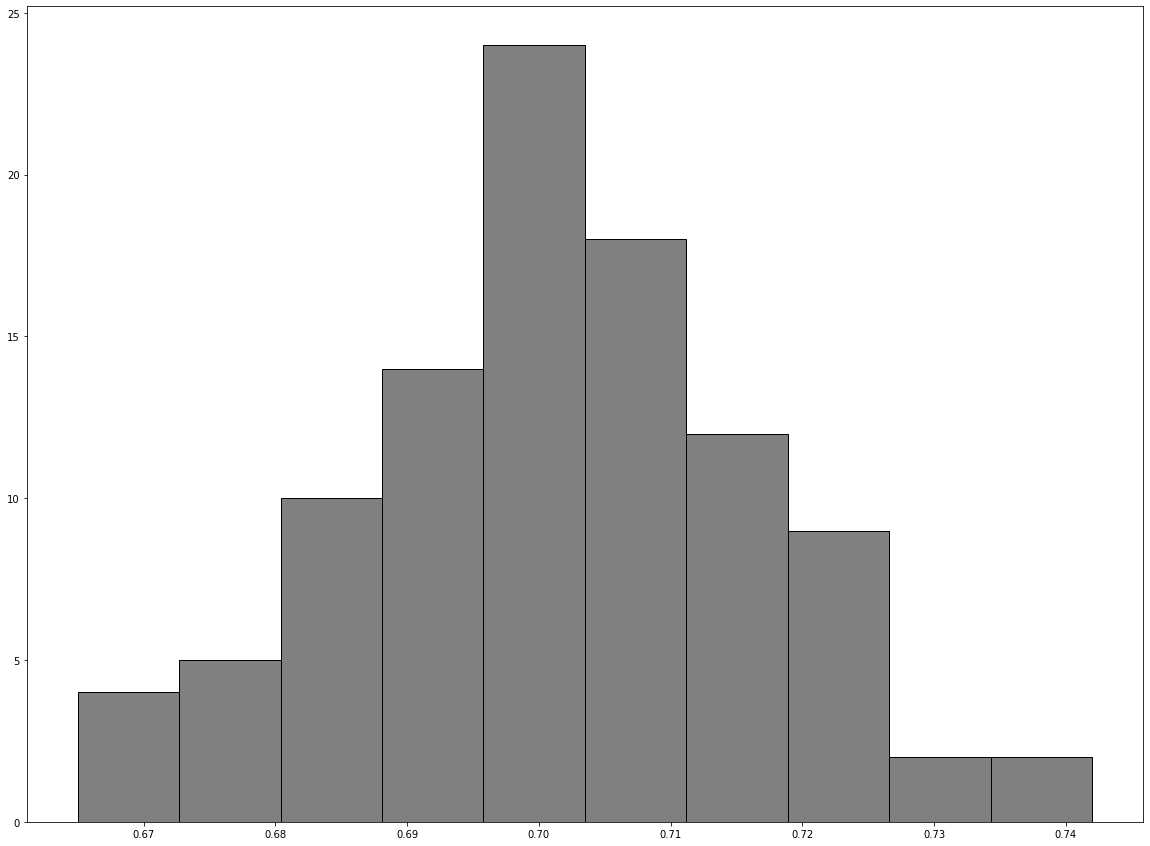

In [ ]:
ss = 1000
reps = 100

mles = []
for i in range(reps):
  sample = rv.stats.bernoulli.rvs(0.7,size = ss)
  mle = 1/ss*np.sum(sample)
  mles.append(mle)

print(mles)
fig, ax = plt.subplots(1,1, figsize=(20,15));

ax.hist(mles,bins='auto',facecolor='grey',edgecolor='black')


9 Finite sample estimators

##9.1
For $X_1 , ..., X_n ∼ Bern(μ)$ implement a simulation which validates the unbiasedness of the sample mean, the unbiasedness of the sample variance, the biasedness of the sample standard deviation, and the biasedness of the maximum likelihood variance parameter estimator.

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as rv
# bern properties
n= 1000
p = 0.7
r_vars = rv.bernoulli.rvs(p, size=n)

#true values of Population (Bern dist)
d_mean = p
d_var = p*(1-p)
d_std = np.sqrt(d_var)
d_mlve = d_var

# iteration
repeats = 10
f= lambda x :(x*(1-x))
MLVE = lambda arr: np.array(list(map(f, arr)))

MIN=lambda arr: np.median(arr,axis=1)
MAX= lambda arr: np.max(arr,axis=1)

def drawBernMean(p,s):
  return np.mean(rv.bernoulli.rvs(p, size=s+1))

def sampleTheMus(reps,n):
  return np.array([[drawBernMean(p,x+1) for i in range(reps)] for x in range(n)])

def drawBernVars(p,s):
  return np.var(rv.bernoulli.rvs(p, size=s+1))

def sampleTheVars(reps,n):
  return np.array([[drawBernVars(p,x+1) for i in range(reps)] for x in range(n)])

s_means = sampleTheMus(repeats,n)
s_var = sampleTheVars(repeats,n)

s_var = np.array([[np.mean(np.var(rv.bernoulli.rvs(p, size=x+1))) for i in range(repeats)] for x in range(n)])

s_std = np.array([[np.mean(rv.stats.tstd(rv.bernoulli.rvs(p, size=x+1))) for i in range(repeats)] for x in range(n)])
d_mlve = MLVE(s_means)

# plotting
fig, axs = plt.subplots(2,2, figsize=(23,18), sharex=True, sharey=False)
axs[0,0].set_xscale('log')
axs = axs.ravel()
x_space = np.arange(1, n+1)


axs[0].axhline(y=p, c='red', label='E(X)')
axs[0].plot(x_space, MIN(s_means), c='aqua', linewidth=0.1, alpha=0.5)
axs[0].plot(x_space, MAX(s_means), c='aqua', linewidth=0.1, alpha=0.5)
axs[0].fill_between(x_space, MIN(s_means), MAX(s_means), alpha=0.5, color='grey', label='$\hat{E}$$(\hat{X})$')
axs[0].set_xlim(100,n)
axs[1].set_ylim(.4,1)
axs[0].legend(fontsize=15)

axs[1].axhline(y=d_var, c='red', label='V(X)')
axs[1].plot(x_space, MIN(s_var), c='aqua', linewidth=0.1, alpha=0.5)
axs[1].plot(x_space, MAX(s_var), c='aqua', linewidth=0.1, alpha=0.5)
axs[1].fill_between(x_space, MIN(s_var), MAX(s_var), alpha=0.5, color='grey', label='$\hat{E}$$(\hat{S}^2)$')
axs[1].set_xlim(100,n)
axs[1].set_ylim(.1,.3)
axs[1].legend(fontsize=15)

axs[2].axhline(y=d_std, c='red',label='S(X)')
axs[2].plot(x_space, MIN(s_std), c='aqua', linewidth=0.1, alpha=0.5)
axs[2].plot(x_space, MAX(s_std), c='aqua', linewidth=0.1, alpha=0.5)
axs[2].fill_between(x_space, MIN(s_std), MAX(s_std), alpha=0.5, color='grey', label='$\hat{E}$$(\hat{S})$')
axs[2].set_xlim(100,n)
axs[2].set_ylim(.4,.5)
axs[2].legend(fontsize=15)

axs[3].axhline(y=d_var, c='red', label='V(X)')
axs[3].plot(x_space, MIN(d_mlve), c='aqua', linewidth=0.1, alpha=0.5)
axs[3].plot(x_space, MAX(d_mlve), c='aqua', linewidth=0.1, alpha=0.5)
axs[3].fill_between(x_space, MIN(d_mlve), MAX(d_mlve), alpha=0.5, color='grey', label='$\hat{E}$$(\hat{\sigma}_{ML}^2)$')
axs[3].set_xlim(100,n)
axs[3].set_ylim(.1,.3)
axs[3].legend(fontsize=15);

##9.2
For $X1, ..., Xn ∼ N(μ, σ^2)$ implement a simulation which validates the unbiasedness of the sample mean, the unbiasedness of the sample variance, the biasedness of the sample standard deviation, and the biasedness of the maximum likelihood variance parameter estimator.

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as rv
# Normal dist properties
n= 1000
p = 0.7
r_vars = rv.norm.rvs(p, size=n)

#true values of Population (Norm dist)
d_mean = p
d_var = p*(1-p)
d_std = np.sqrt(d_var)
d_mlve = d_var

# iteration
repeats = 10
f= lambda x :(x*(1-x))
MLVE = lambda arr: np.array(list(map(f, arr)))

MIN=lambda arr: np.median(arr,axis=1)
MAX= lambda arr: np.max(arr,axis=1)

def drawNormMean(p,s):
  return np.mean(rv.norm.rvs(p, size=s+1))

def sampleTheMus_Norm(reps,n):
  return np.array([[drawNormMean(p,x+1) for i in range(reps)] for x in range(n)])

def drawNormVars(p,s):
  return np.var(rv.norm.rvs(p, size=s+1))

def sampleTheVars_Norm(reps,n):
  return np.array([[drawNormVars(p,x+1) for i in range(reps)] for x in range(n)])


# Unbiasedness of the sample mean
s_means = sampleTheMus_Norm(repeats,n)
s_var = sampleTheVars_Norm(repeats,n)

s_var = np.array([[np.mean(np.var(rv.norm.rvs(p, size=x+1))) for i in range(repeats)] for x in range(n)])

s_std = np.array([[np.mean(rv.stats.tstd(rv.norm.rvs(p, size=x+1))) for i in range(repeats)] for x in range(n)])
d_mlve = MLVE(s_means)
print(s_means.shape)
print(s_std.shape)
# plotting
fig, axs = plt.subplots(2,2, figsize=(23,18), sharex=True, sharey=False)
axs[0,0].set_xscale('log')
axs = axs.ravel()
x_space = np.arange(1, n+1)


axs[0].axhline(y=p, c='red', label='E(X)')
axs[0].plot(x_space, MIN(s_means), c='aqua', linewidth=0.1, alpha=0.5)
axs[0].plot(x_space, MAX(s_means), c='aqua', linewidth=0.1, alpha=0.5)
axs[0].fill_between(x_space, MIN(s_means), MAX(s_means), alpha=0.5, color='grey', label='$\hat{E}$$(\hat{X})$')
axs[0].set_xlim(100,n)
axs[1].set_ylim(.4,1)
axs[0].legend(fontsize=15)

axs[1].axhline(y=d_var, c='red', label='V(X)')
axs[1].plot(x_space, MIN(s_var), c='aqua', linewidth=0.1, alpha=0.5)
axs[1].plot(x_space, MAX(s_var), c='aqua', linewidth=0.1, alpha=0.5)
axs[1].fill_between(x_space, MIN(s_var), MAX(s_var), alpha=0.5, color='grey', label='$\hat{E}$$(\hat{S}^2)$')
axs[1].set_xlim(100,n)
axs[1].set_ylim(.1,.3)
axs[1].legend(fontsize=15)

axs[2].axhline(y=d_std, c='red',label='S(X)')
axs[2].plot(x_space, MIN(s_std), c='aqua', linewidth=0.1, alpha=0.5)
axs[2].plot(x_space, MAX(s_std), c='aqua', linewidth=0.1, alpha=0.5)
axs[2].fill_between(x_space, MIN(s_std), MAX(s_std), alpha=0.5, color='grey', label='$\hat{E}$$(\hat{S})$')
axs[2].set_xlim(100,n)
axs[2].set_ylim(.4,.5)
axs[2].legend(fontsize=15)

axs[3].axhline(y=d_var, c='red', label='V(X)')
axs[3].plot(x_space, MIN(d_mlve), c='aqua', linewidth=0.1, alpha=0.5)
axs[3].plot(x_space, MAX(d_mlve), c='aqua', linewidth=0.1, alpha=0.5)
axs[3].fill_between(x_space, MIN(d_mlve), MAX(d_mlve), alpha=0.5, color='grey', label='$\hat{E}$$(\hat{\sigma}_{ML}^2)$')
axs[3].set_xlim(100,n)
axs[3].set_ylim(.1,.3)
axs[3].legend(fontsize=15);

10 Asymptotic estimator

##10.1
Write a simulation that verifies the asymptotic unbiasedness of the maximum likelihood estimator for the variance parameter of a univariate Gaussian distribution. Include a verification of the unbiasedness of the sample variance.

[0.999, 0.9995, 0.9996666666666667, 0.99975, 0.9998, 0.9999833333333333]


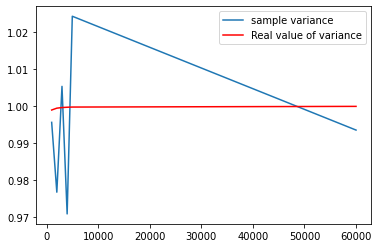

In [ ]:
"""
lim.     n-1/n * var  = var (law of limits for powers => n/n  =1 => 1* var)
n-> inf
"""
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as rv
sample_sizes = [1000,2000,3000,4000,5000,60000]

sample_var = lambda x,ss : ((ss-1)/ss) * x

mu = 5
var =1

experiment_vals =[]
formula_vals =[]
for ss in sample_sizes:
  sample = rv.norm.rvs(mu,var,size = ss )
  experiment_vals.append(np.var(sample))
  formula_vals.append(sample_var(var,ss))

print(formula_vals)
plt.plot(sample_sizes,experiment_vals,label="sample variance")
plt.plot(sample_sizes,formula_vals,color='r',label="Real value of variance")
plt.legend()




##10.2
Write a simulation that verifies the asymptotic efficiency of the maximum likelihood estimator for the parameter of a Bernoulli distribution.

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as rv
mu = 0.7
bern = rv.bernoulli(p=mu)
mu_mle = []
sample_sizes = [50,100,300,1000]

mle = lambda ss,sample : (1/ss) * np.sum(sample)
for ss in sample_sizes:
    for n in range(1,ss+1):
        sample = bern.rvs(size=n)
        # sample mean is MLE for Bernoulli parameter
        mu_mle.append(mle(n,sample))

    fig, ax = plt.subplots()
    ax.hist(mu_mle, bins=20, density=True, color='black', alpha=0.5, ec='black', label='$\hat{p}(\hat\mu_n^{ML})$')
    ax.plot(np.linspace(0,1), rv.norm(loc=mu, scale=mu*(1-mu)/n).pdf(np.linspace(0,1)), label='$N(\mu,\mu (1-\mu)/n)$',color='red')
    ax.set_title('$\mu='+str(mu)+', n='+str(n)+'$')
    ax.set_xlabel('$\mu$')
    ax.legend(frameon=False)
    plt.show()

##10.3
Write a simulation that verifies the asymptotic efficiency of the maximum likelihood estimator for the variance parameter of a univariate Gaussian distribution.

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as rv
var = 2
gaussian = rv.norm(loc=0,scale=np.sqrt(var))
var_mle = []
mle = lambda ss, sample : (1/ss) * sum(np.power(sample-np.mean(sample),2))
for N in [20,100,300]:
    for n in range(1,N+1):
        sample = gaussian.rvs(size=n)
        var_mle.append(mle(n,sample))

    fig, ax = plt.subplots()
    ax.hist(var_mle, bins=20, label='$\hat{p}(\hat\sigma^2_n^{ML})$',density=True, color='gray', alpha=0.5, ec='black')
    ax.plot(np.linspace(0,5), rv.norm(loc=var, scale=2*np.power(var,2)/n).pdf(np.linspace(0,5)), label='$N(\sigma^2, \frac{2\sigma^4}{n})$')
    ax.set_title('$\sigma^2='+str(var)+', n='+str(n)+'$')
    ax.set_xlabel('$\sigma^2$')
    plt.show()

11 Confidence Intervals

##11.1
Write a simulation that verifies that the T statistic is distributed according to a t-distribution with $n − 1$ degrees of freedom.

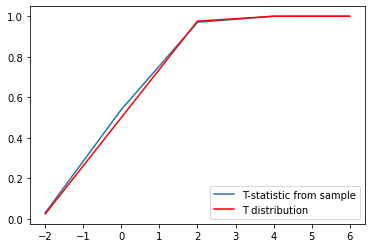

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as rv

t_statistic = lambda sample,deviation,mu : (np.sqrt(len(sample)) / deviation ) * (np.mean(sample) - mu)


reps = 100

mu = 2
stdev = 2
ss = 100

x = np.linspace(-2 , 6 , 5 )
transformations = []
t_cdf =[]
for xx in x:
  for i in range(reps):
    sample = rv.norm.rvs(mu,stdev,size =ss )
    transformations.append(t_statistic(sample,stdev,mu))
  transformations = np.asarray(transformations)
  t_cdf.append(np.sum([1 for x in transformations if x<=xx])/ss)
  transformations=[]


plt.plot(x,t_cdf,label="T-statistic from sample")
plt.plot(x,rv.t.cdf(x,ss-1),color='r',label= "T distribution")
plt.legend()



##11.2
Write a simulation that verifies that the 95%-confidence interval for the expectation parameter of a Gaussian distribution with unknown variance comprises the true, but unknown, expectation parameter in ≈ 95% of its realizations.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


Text(0.5, 1.0, 'Coverage probability estimate $\\hat{P} = $ 0.94, n = 12')

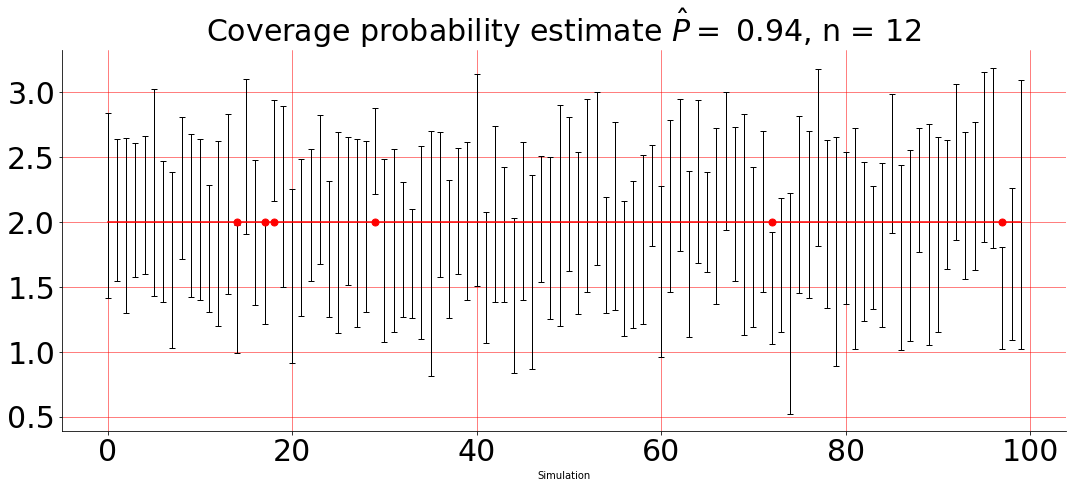

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as rv

fill_empties = lambda n,s: np.full([n,s], np.nan)
mu = 2
sigsqr = 1
n = 12
delta = 0.95
t_2 = rv.t.ppf((1+delta)/2,n-1)
n_sim = np.int(1e2)
s = range(n_sim)
X_bar = fill_empties(n_sim,1)
S = fill_empties(n_sim,1)
gamma = fill_empties(n_sim,1)
C = fill_empties(n_sim,2)
mu_in_c = fill_empties(n_sim,1)

get_gamma = lambda s,n : s/np.sqrt(n)
get_norm_sample = lambda mu,var,ss : rv.norm.rvs(mu,np.sqrt(var),size = ss)

#Gaussian
for i in range(n_sim):
  sample = get_norm_sample(mu,sigsqr,n)
  X_bar[i] = np.mean(sample)
  S[i] = np.sqrt(np.var(sample,ddof =1))
  gamma[i] = t_2*(get_gamma(S[i],n))
  C[i,0] = X_bar[i] - gamma[i]
  C[i,1] = X_bar[i] + gamma[i]

  if mu >= C[i,0] and mu <= C[i,1]:
    mu_in_c[i] = 1
  else:
    mu_in_c[i] = 0

mu_nin_C = np.argwhere(mu_in_c == False)

fig = plt.figure(figsize = (18,7))
ax = {}
ax[0] = plt.subplot()
ax[0].plot( s,
           mu*np.ones([n_sim,1]),
           color = "red")
ax[0].errorbar(s,
               X_bar,
               xerr = None,
               yerr = gamma,
               linestyle = "",
               linewidth = 1,
               capsize = 3,
               color = [0, 0, 0])
ax[0].plot(mu_nin_C[:,0],
           2*np.ones([len(mu_nin_C),1]),
           ls="",
           marker = "o",
           ms = 7,
           mfc ="r",
           mec = "r")
ax[0].set_xlabel("Simulation")
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].tick_params(labelsize = 30)
ax[0].grid(True, linewidth = .5, color = "red")
ax[0].set_title("Coverage probability estimate $\hat{{P}} = $ {0:1.2f}, n = {1:1.0f}".format(np.mean(mu_in_c),n),fontsize = 30)

##11.3
Write a simulation that verifies that the approximate 95%-confidence interval for the expectation parameter of a Bernoulli distribution comprises the true, but unknown, expectation parameter in ≈ 95% of its realizations.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


Text(0.5, 1.0, 'Coverage probability estimate $\\hat{P} = $ 1.00, n = 12')

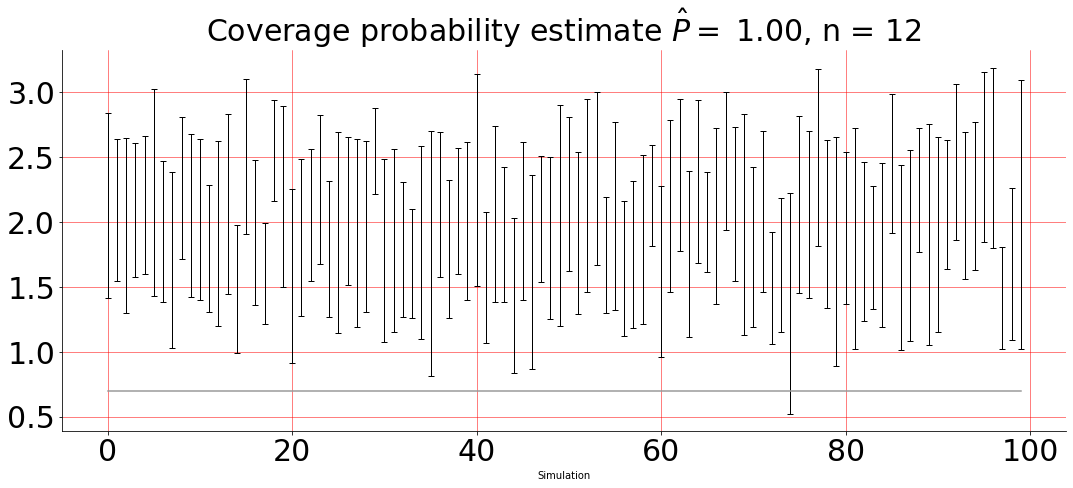

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as rv
mu = 0.7
n = 12
delta = 0.95
z_delta = rv.norm.ppf((1+delta)/2,0,1)
n_sim = np.int(1e2)
s = range(n_sim)
mu_hat = fill_empties(n_sim,1)
J_inv = fill_empties(n_sim,1)
C = fill_empties(n_sim,2)
mu_in_c = fill_empties(n_sim,1)

get_bernSample = lambda p,ss :rv.bernoulli.rvs(p, size = ss)
calculate_bl_x = lambda xhat,err : xhat-err
calculate_bu_x = lambda xhat,err : xhat+err
#Bernoulli
for i in range(n_sim):
  X = get_bernSample(mu,n)
  mu_hat[i] = np.mean(X)
  J_inv[i] = mu_hat[i]*(1-mu_hat[i]/n)
  C[i,0] = calculate_bl_x(mu_hat[i],np.sqrt(J_inv[i])*z_delta)

  C[i,1] = calculate_bu_x(mu_hat[i],np.sqrt(J_inv[i])*z_delta)

  if mu >= C[i,0] and mu <= C[i,1]:
    mu_in_c[i] = 1
  else:
    mu_in_c[i] = 0

mu_nin_C = np.argwhere(mu_in_c == False)

fig = plt.figure(figsize = (18,7))
ax = {}
ax[0] = plt.subplot()
ax[0].plot( s,
           mu*np.ones([n_sim,1]),
           color = [.6, .6, .6])
ax[0].errorbar(s,
               X_bar,
               xerr = None,
               yerr = gamma,
               linestyle = "",
               linewidth = 1,
               capsize = 3,
               color = [0, 0, 0])
ax[0].plot(mu_nin_C[:,0],
           2*np.ones([len(mu_nin_C),1]),
           ls="",
           marker = "o",
           ms = 7,
           mfc ="r",
           mec = "r")
ax[0].set_xlabel("Simulation")
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].tick_params(labelsize = 30)
ax[0].grid(True, linewidth = .5, color = "red")
ax[0].set_title("Coverage probability estimate $\hat{{P}} = $ {0:1.2f}, n = {1:1.0f}".format(np.mean(mu_in_c),n),fontsize = 30)

12 Hypothesis Testing


##12.1
By means of simulation, show that a two-sided T test with simple null hypothesis $Θ_0 := {μ_0}$ of significance level $α′$ is exact.

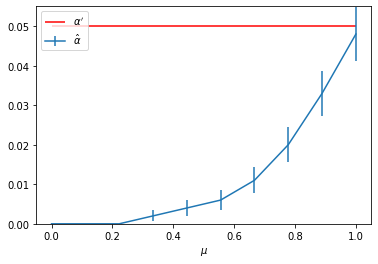

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as rv
mu = 0.7
repeats = np.int(1e3)
alpha  = 0.05
sample_size = np.int(12)

mu_0 = 1
theta = np.linspace(0,mu_0, 10)
alpha_est = np.full([10,2], np.nan)            # the outputs for thetas
t_stats = np.full(repeats, np.nan)

sigmasqr = 2
df = sample_size-1
c_alpha_prime  = rv.t.ppf(1 - alpha, df)
t_statistic = lambda sample,deviation,mu : (np.sqrt(len(sample)) / deviation ) * (np.mean(sample) - mu)
get_norm_sample = lambda mu,var,ss : rv.norm.rvs(mu,np.sqrt(var),size = ss)


for k, mu in np.ndenumerate(theta):
  test_result = np.full(repeats,np.nan)
  for s in range(repeats):
    sample =  get_norm_sample(mu,sigmasqr,sample_size)
    get_norm_sample(mu,sigmasqr,sample_size)
    mean_of_sample = np.mean(sample)
    std_dev = np.sqrt(np.var(sample, ddof = 1))
    t_stats[s] = t_statistic(sample,std_dev,mu_0)

    if t_stats[s] >= c_alpha_prime:        # reject null hypothesis
      test_result[s] = 1
    else:
      test_result[s] = 0

  # test size
  alpha_est[k[0],0] = np.mean(test_result)
  alpha_est[k[0],1] = np.std(test_result, ddof = 1)/ np.sqrt(repeats)

plt.hlines(alpha, theta[0], theta[-1], colors= 'red',label = r'$\alpha^\prime$')
plt.errorbar(theta ,alpha_est[:,0], alpha_est[:,1],
                       label = r'$\hat{\alpha}$')
plt.xlabel('$\mu$')
plt.ylim(0, 0.055)
plt.legend()

##12.2
By means of simulation, demonstrate that the δ-confidence interval-based test for the expectation parameter of univariate Gaussian distribution is of significance level $α′ = 1 − δ$.

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as rv
mu, sigmasqr = 0, 1                                                              # true but unknown mean and variance
x1 = get_norm_sample(mu,sigmasqr,10000)

alpha = 0.05                                                                     # significance level = .05
n1 = len(x1)
s1 = np.sqrt(np.var(x1, ddof= 1))
m1 = np.mean(x1)
df = n1-1                                                                        # 1 degree of freedom
t_s  = rv.t.ppf(1 - alpha/2, df)                                                 # inverse of cdf - percent point function

calculate_bl_x = lambda xhat,err : xhat-err
calculate_bu_x = lambda xhat,err : xhat+err

lower =  calculate_bl_x(m1,s1 * t_s/np.sqrt(n1))
upper =  calculate_bu_x(m1,s1 * t_s/np.sqrt(n1))
C_n = (lower, upper)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

_, bins, _ = ax1.hist(x1, bins = 50, density=True,  alpha=0.6,
                              ec = 'black', label = 'Histogram of $N(x; {mean},{var})$'.format(mean=round(mu,2), var=round(sigmasqr,2)))
ax1.plot(bins, rv.norm.pdf(bins), label = 'PDF of $N(x;0,1)$')
ax1.set_title('Gaussian Distribution $\sim$ N(x;{mu},{var})'.format(mu=round(mu,2), var=round(sigmasqr,2)))


_, bins, _ = ax2.hist(x1, bins = 50, density=True,  alpha=0.6,
                              ec = 'black')
ax2.plot(bins, rv.norm.pdf(bins), label = 'PDF of $N(x;{mu},{var})$'.format(mu=round(mu,2), var=round(sigmasqr,2)))
ax2.vlines(lower, 0, 0.5,  label = 'Lower: {lb}'.format(lb=round(lower,4)), linestyle = '--', colors= 'red')
ax2.vlines(upper, 0, 0.5,  label = 'Upper: {ub}'.format(ub=round(upper,4)), linestyle = '--', colors ='red' )
ax2.vlines(mu, 0, 0.5,  label = '$E(X)$:{e_x}'.format(e_x=round(m1,4)), colors = 'purple')
ax2.fill_between([lower, upper], 0, 0.5, alpha = 0.3, color = 'grey')
ax2.set_xlim(-0.5,0.5)
ax2.legend(loc='upper right', frameon=False, fontsize='small')
ax2.set_title('Closer View to Lower and Upper Bounds - $\delta$-Significance Level')

if mu >= lower and mu <= upper:
  print('Null hypothesis is not rejected. Mu: ', round(mu,4), '.')
else:
  print('Null hypothesis is rejected. Mu:', round(mu,4), '.')

13 Conjugate Inference

##13.1
For n = 10, implement batch and recursive Bayesian estimation for the Beta-Binomial model. Compare the results based on identical samples.

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as rv

class Beta:
    def __init__(self, a = 1, b = 1):
        self.a = a
        self.b = b

    def pdf(self):
        x = np.linspace(0, 1, 1000)
        fx = self.sample_bata(x, self.a, self.b)
        return x,fx

    def sample_bata(self,x_,alpha,beta):
      return rv.beta.pdf(x_, alpha, beta)


    def update(self, n, num_successes):
        self.a = self.a + num_successes
        self.b = self.b + n - num_successes

#Sample size (n=10)
success_list = [0,1,0,0,1,0,1,0,1,0]


dist = Beta(a = 5, b = 5)
pr_x,pr_fx = dist.pdf()
for x in success_list:
  #update
  dist.update( n = 1, num_successes = x)
  posteriorx,posteriorfx = dist.pdf()



  plt.plot(pr_x, pr_fx)
  plt.plot(posteriorx, posteriorfx)
  plt.legend(['Prior Distribution', 'Posterior Distribution'], loc='upper left')
  plt.show()
  prior = posterior


14 Numerical methods

##14.1
Estimate the expected value of a Beta($α,β$) for varying values of $α$ and $β$ by means of Monte Carlo integration by using a Beta distribution random number generator. Compare the results to the true expected values.

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as rv
import matplotlib.gridspec as gridspec

class RejectionAcceptanceDTO:

  def __init__(self,n,s,mu,var,a,b,c):
    self.s =s
    self.n = n
    self.mu = mu
    self.var = var
    self.a = a
    self.b = b
    self.c = c

class Chapter14:

  def __init__(self):
    self.init_params()


  def init_params(self):
    self.n_all = np.array([10,100,1000])
    self.a_min = 1
    self.a_max = 10
    self.a_res = 50
    self.a = np.linspace(self.a_min, self.a_max, self.a_res)
    self.b_min = 1
    self.b_max = 10
    self.b_res = 50
    self.b = np.linspace(self.b_min, self.b_max, self.b_res)
    self.E = np.full([self.a_res,self.b_res, len(self.n_all)+1], np.nan)


  def sample_beta(self,alpha,beta, ss):
    return rv.beta.rvs(alpha, beta, size = ss)

  def acceptance_rejection_Algorithm(self,parmasDTO):
    Y = np.full([parmasDTO.n,1], np.nan)
    while parmasDTO.s < parmasDTO.n:
      x = rv.norm.rvs(parmasDTO.mu,parmasDTO.var)
      u = rv.uniform.rvs()
      if u <= rv.beta.pdf(x, parmasDTO.a, parmasDTO.b) / (parmasDTO.c*rv.norm.pdf(x,parmasDTO.mu,parmasDTO.var)):
        Y[parmasDTO.s] = x
        parmasDTO.s = parmasDTO.s+1
    return Y

  def task3(self):
    #parameter definition
      y_space = np.linspace(0,1,np.int(1e3))

      alpha = 2
      beta = 6

      mu = 0
      sigsqr = 1
      c = 7

      #sample
      n = np.int(1e4)
      s = 0

      dto = RejectionAcceptanceDTO(n,s,mu,sigsqr,alpha,beta,c)
      Y=self.acceptance_rejection_Algorithm(dto)

      fig = plt.figure(figsize = (15,5))
      gs = gridspec.GridSpec(1,2)
      id = 0
      ax = {}

      ax[0] = plt.subplot(gs[0])
      ax[0].plot(y_space,
                rv.beta.pdf(y_space, alpha, beta),
                label = r"Beta$({},{})$".format(alpha,beta))
      ax[0].plot(y_space,
                c*rv.norm.pdf(y_space, mu, sigsqr),
                label = r"${}\cdot N({},{})$".format(c, mu, sigsqr))
      ax[0].set_xlim(0,1)
      ax[0].set_ylim(0, 3.5)
      ax[0].set_title("Proposal & target density")
      ax[0].set_xlabel(r"$y$")
      ax[0].spines["right"].set_visible(False)
      ax[0].spines["top"].set_visible(False)
      ax[0].tick_params(labelsize = 16)
      ax[0].legend(loc = "upper right", frameon = False)



  def task2(self):
    for i, alpha in np.ndenumerate(self.a):
      for j, beta in np.ndenumerate(self.b):
        self.E[i,j,0] = alpha / (alpha + beta)
        for k,n in np.ndenumerate(self.n_all):
          X = rv.uniform.rvs(size=n)
          I_hat_n = 1/n * np.sum(X*(rv.beta.pdf(X,alpha,beta)))
          self.E[i,j,k[0]+1] = I_hat_n

  def task1(self):
    for i, alpha in np.ndenumerate(self.a):
      for j, beta in np.ndenumerate(self.b):
        self.E[i,j,0] = alpha / (alpha + beta)
        for k,n in np.ndenumerate(self.n_all):
          self.E[i,j,k[0]+1] = np.mean(self.sample_beta(alpha, beta,n))
          # could not get the plot to work for this task, I can't replicate the images shown in the pdf for this exercise
          # the matlab lib is not ported to python.
          # There is an alternative solution to get this working here https://stackoverflow.com/questions/18948009/what-is-the-equivalent-of-imagesc-in-opencv
          # but I can't guarantee that the task will be runable in any environment . One way is to wrap the cpp code with a cython header



In [ ]:
t1 = Chapter14()
t1.task1()
t1.E

array([[[0.5       , 0.53954977, 0.48340325, 0.51448043],
        [0.45794393, 0.30318868, 0.46490334, 0.46348642],
        [0.42241379, 0.33562047, 0.44458688, 0.43284415],
        ...,
        [0.0940499 , 0.10135764, 0.09506722, 0.09730666],
        [0.09245283, 0.08714612, 0.09628566, 0.08703485],
        [0.09090909, 0.08867395, 0.10334089, 0.08500892]],

       [[0.54205607, 0.62790979, 0.60289122, 0.54120289],
        [0.5       , 0.43329779, 0.48012047, 0.51440919],
        [0.464     , 0.47100218, 0.41508821, 0.46441143],
        ...,
        [0.10943396, 0.10181683, 0.09134124, 0.10426851],
        [0.10760668, 0.08939111, 0.10964294, 0.10884946],
        [0.10583942, 0.09013289, 0.11018504, 0.10572493]],

       [[0.57758621, 0.67531192, 0.58879297, 0.58594095],
        [0.536     , 0.57996696, 0.54342917, 0.54311413],
        [0.5       , 0.61800353, 0.52448688, 0.48853196],
        ...,
        [0.12430427, 0.10883271, 0.11638595, 0.12262155],
        [0.12226277, 0.135448

##14.2
Estimate the expected value of a Beta($α,β$) for varying values of $α$ and $β$ by means of Monte Carlo integration using an importance sampling scheme and a uniform random number generator.

In [ ]:
t2 = Chapter14()
t2.task2()
t2.E

array([[[0.5       , 0.36447367, 0.5494901 , 0.50088432],
        [0.45794393, 0.52565755, 0.51513096, 0.46017766],
        [0.42241379, 0.47558749, 0.45753768, 0.42704931],
        ...,
        [0.0940499 , 0.07032392, 0.08524105, 0.09791806],
        [0.09245283, 0.11644208, 0.07498725, 0.09724668],
        [0.09090909, 0.05133   , 0.08834913, 0.09948028]],

       [[0.54205607, 0.51984035, 0.56145719, 0.54853265],
        [0.5       , 0.50952813, 0.51584465, 0.50577721],
        [0.464     , 0.51331148, 0.45993367, 0.465045  ],
        ...,
        [0.10943396, 0.1163438 , 0.09527746, 0.11531561],
        [0.10760668, 0.08862974, 0.08079265, 0.10977511],
        [0.10583942, 0.12441996, 0.10488928, 0.10848186]],

       [[0.57758621, 0.76453751, 0.57309381, 0.5719562 ],
        [0.536     , 0.44245796, 0.54873784, 0.54858997],
        [0.5       , 0.64451898, 0.5202382 , 0.50495072],
        ...,
        [0.12430427, 0.13058172, 0.12712784, 0.12233224],
        [0.12226277, 0.138482

##14.3
Use an acceptance-rejection algorithm to sample random numbers from Beta(2, 6).

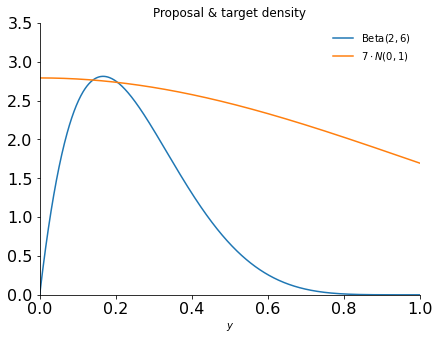

In [ ]:
t3 = Chapter14()
t3.task3()
